Métodos Ensemble: Random Forest
o	Utilize a biblioteca Scikit-Learn para criar um modelo de Random Forest em um conjunto de dados de sua escolha. Avalie a importância das características e visualize as árvores individuais.


In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
# 1. Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# 2. Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 3. Treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Fazer previsões
y_pred = rf_model.predict(X_test)

In [6]:
# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Random Forest: {accuracy * 100:.2f}%')

Acurácia do modelo Random Forest: 100.00%


In [7]:
# 4. Avaliar a importância das características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

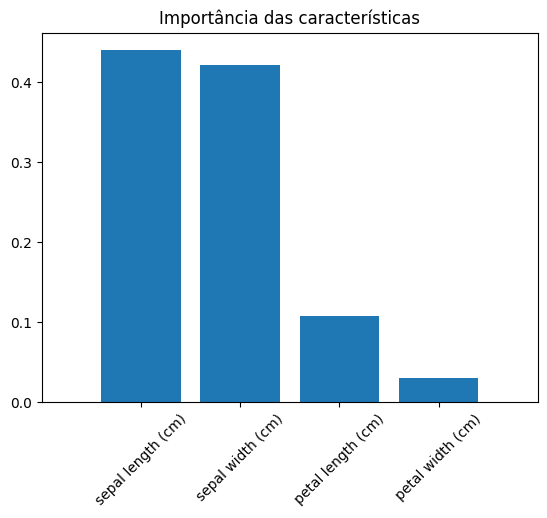

In [11]:
# Visualizar a importância das características
plt.figure()
plt.title("Importância das características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

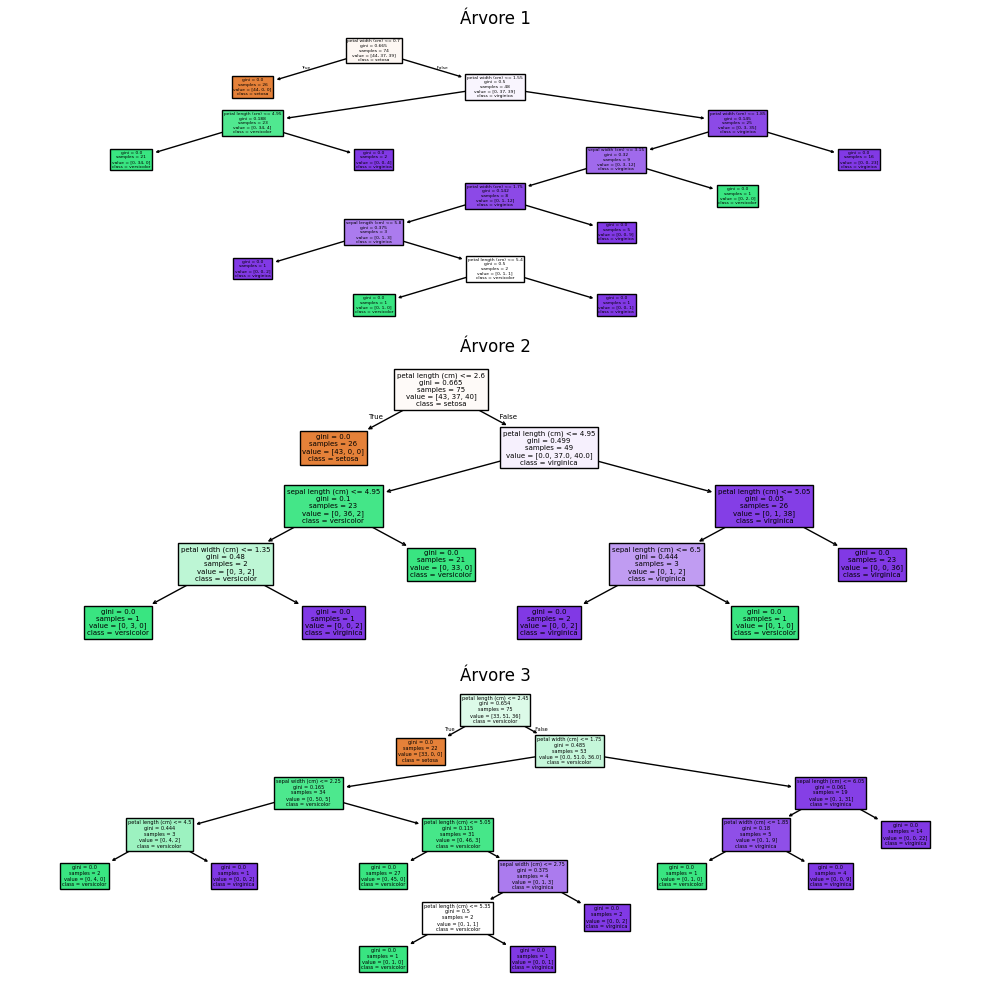

In [14]:
# 5. Visualizar algumas árvores individuais do modelo Random Forest
n_trees = 3  # Número de árvores a visualizar
fig, axes = plt.subplots(n_trees, 1, figsize=(10, 10))

for i in range(n_trees):
    ax = axes[i]
    plot_tree(rf_model.estimators_[i], feature_names=iris.feature_names, class_names=iris.target_names, filled=True, ax=ax)
    ax.set_title(f"Árvore {i+1}")

plt.tight_layout()
plt.show()